In [177]:
# 根据MOD文件整理各离子通道的门控动力学（公式和参数全部来自MOD文件）

In [178]:
import numpy as np
import matplotlib.pyplot as plt

In [179]:
# 创建电位数组
v = np.arange(-300.0, 300, 0.01)

In [180]:
# Im离子通道

# 初始化参数
g_max_Im = 0.00001                                              # 最大电导（S/cm²）
T_Im = 34                                                       # 目标温度（℃）
T_base_Im = 21                                                  # 初始温度（℃）
Q10_Im = 2.3                                                    # 温度升高10℃的速率比
qt_Im = Q10_Im ** ((T_Im - T_base_Im) / 10)                     # 温度因子（也称作纠错率 corrected rates）
mAlpha_Im = np.zeros(len(v))                                    # 门控变量m的开门速率
mBeta_Im = np.zeros(len(v))                                     # 门控变量m的关门速率
mTau_Im = np.zeros(len(v))                                      # 门控变量m的时间常数
mInf_Im = np.zeros(len(v))                                      # 门控变量m的稳定态

# 计算离子通道的门控动力学，即稳定态x∞和时间常数τx
for i in range(1, len(v)):
    mAlpha_Im[i] = 3.3e-3 * np.exp(2.5 * 0.04 * (v[i] + 35))
    mBeta_Im[i] = 3.3e-3 * np.exp(-2.5 * 0.04 * (v[i] + 35))
    mInf_Im[i] = mAlpha_Im[i] / (mAlpha_Im[i] + mBeta_Im[i])
    mTau_Im[i] = (1 / (mAlpha_Im[i] + mBeta_Im[i])) / qt_Im

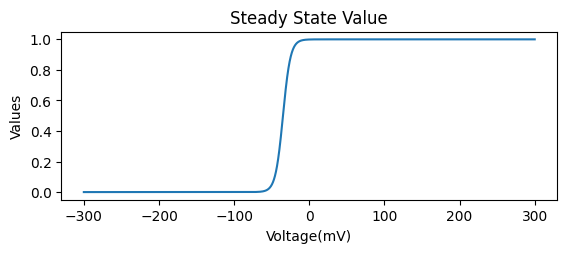

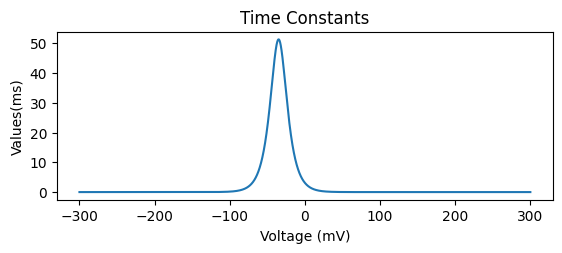

In [181]:
# 绘图：Im离子通道
plt.clf()

# 稳定态和时间常数随膜电位变化的图像（画成一张大图里的两张子图）
plt.subplot(2, 1, 1)
plt.plot(v, mInf_Im)
plt.title('Steady State Value')
plt.xlabel('Voltage(mV)')
plt.ylabel('Values')
plt.show()
plt.subplot(2, 1, 2)
plt.plot(v, mTau_Im)
plt.title('Time Constants')
plt.xlabel('Voltage (mV)')
plt.ylabel('Values(ms)')
plt.show()

In [182]:
# KP离子通道

# 初始化参数
g_max_KP = 0.00001                                              # 最大电导（S/cm²）
T_KP = 34                                                       # 目标温度（℃）
T_base_KP = 21                                                  # 初始温度（℃）
Q10_KP = 2.3                                                    # 温度升高10℃的速率比
qt_KP = Q10_KP ** ((T_KP - T_base_KP) / 10)                     # 温度因子（也称作纠错率 corrected rates）
mTau_KP = np.zeros(len(v))                                      # 门控变量m的时间常数
mInf_KP = np.zeros(len(v))                                      # 门控变量m的稳定态
hTau_KP = np.zeros(len(v))                                      # 门控变量h的时间常数
hInf_KP = np.zeros(len(v))                                      # 门控变量h的稳定态

# 暂时未弄清这两个参数的作用
v_shift_KP = 0
tauF_KP = 1.0

# 计算离子通道的门控动力学，即稳定态x∞和时间常数τx
for i in range(0, len(v)):
    mInf_KP[i] = 1 / (1 + np.exp(-(v[i] - (-14.3 + v_shift_KP)) / 14.6))
    hTau_KP[i] =  (360+ (1010 + 24 * (v[i] - (-55 + v_shift_KP))) * np.exp(-((v[i] - (-75 + v_shift_KP)) / 48) ** 2)) / qt_KP
    hInf_KP[i] =  1/(1 + np.exp(-(v[i] - (-54 + v_shift_KP))/-11))
    if v[i] < (-50 + v_shift_KP):
            mTau_KP[i] = tauF_KP * (1.25 + 175.03 * np.exp(-(v[i] - v_shift_KP) * -0.026)) / qt_KP
    else:
          mTau_KP[i] = tauF_KP * (1.25 + 13 * np.exp(-(v[i] - v_shift_KP) * 0.026)) / qt_KP

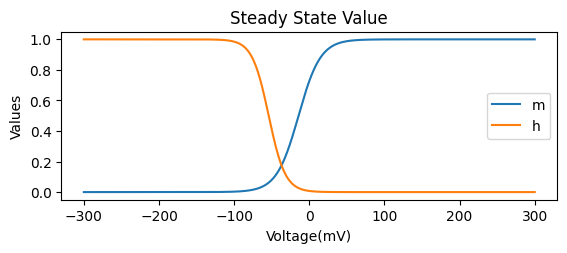

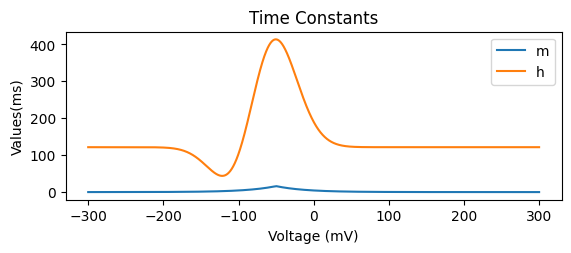

In [183]:
# 绘图：KP离子通道
plt.clf()

# 稳定态和时间常数随膜电位变化的图像（画成一张大图里的两张子图）
plt.subplot(2, 1, 1)
plt.plot(v, mInf_KP)
plt.plot(v, hInf_KP)
plt.title('Steady State Value')
plt.xlabel('Voltage(mV)')
plt.ylabel('Values')
plt.legend(['m', 'h'])
plt.show()
plt.subplot(2, 1, 2)
plt.plot(v, mTau_KP)
plt.plot(v, hTau_KP)
plt.title('Time Constants')
plt.xlabel('Voltage (mV)')
plt.ylabel('Values(ms)')
plt.legend(['m', 'h'])
plt.show()

In [184]:
# KT离子通道

# 初始化参数
g_max_KT = 0.00001                                              # 最大电导（S/cm²）
T_KT = 34                                                       # 目标温度（℃）
T_base_KT = 21                                                  # 初始温度（℃）
Q10_KT = 2.3                                                    # 温度升高10℃的速率比
qt_KT = Q10_KT ** ((T_KT - T_base_KT) / 10)                     # 温度因子（也称作纠错率 corrected rates）
mTau_KT = np.zeros(len(v))                                      # 门控变量m的时间常数
mInf_KT = np.zeros(len(v))                                      # 门控变量m的稳定态
hTau_KT = np.zeros(len(v))                                      # 门控变量h的时间常数
hInf_KT = np.zeros(len(v))                                      # 门控变量h的稳定态

# 暂时未弄清这两个参数的作用
v_shift_KT = 0
tauF_KT_m = tauF_KT_h = 1.0

# 计算离子通道的门控动力学，即稳定态x∞和时间常数τx
for i in range(0, len(v)):
    mInf_KT[i] =  1 / (1 + np.exp(-(v[i] - (-47 + v_shift_KT)) / 29))
    mTau_KT[i] =  (0.34 + tauF_KT_m * 0.92 * np.exp(-((v[i] + 71 - v_shift_KT) / 59) ** 2)) / qt_KT
    hInf_KT[i] =  1 / (1 + np.exp(-(v[i] + 66 - v_shift_KT) / -10))
    hTau_KT[i] =  (8 + tauF_KT_h * 49 * np.exp(-((v[i] + 73 - v_shift_KT) / 23) ** 2)) / qt_KT

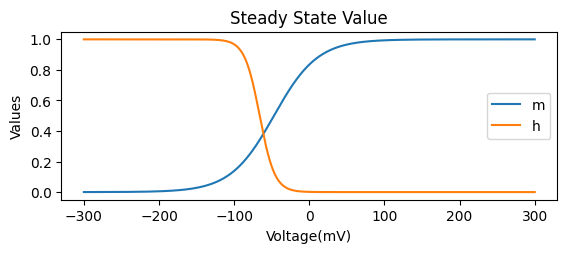

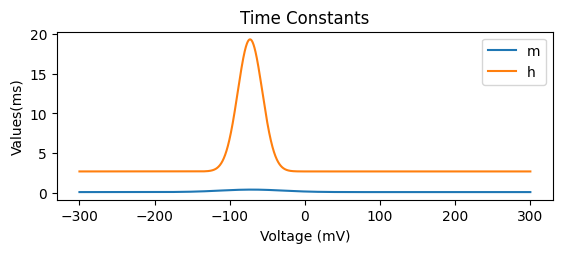

In [185]:
# 绘图：KT离子通道
plt.clf()

# 稳定态和时间常数随膜电位变化的图像（画成一张大图里的两张子图）
plt.subplot(2, 1, 1)
plt.plot(v, mInf_KT)
plt.plot(v, hInf_KT)
plt.title('Steady State Value')
plt.xlabel('Voltage(mV)')
plt.ylabel('Values')
plt.legend(['m', 'h'])
plt.show()
plt.subplot(2, 1, 2)
plt.plot(v, mTau_KT)
plt.plot(v, hTau_KT)
plt.title('Time Constants')
plt.xlabel('Voltage (mV)')
plt.ylabel('Values(ms)')
plt.legend(['m', 'h'])
plt.show()

In [186]:
# Kd离子通道

# 初始化参数
g_max_Kd = 0.00001                                              # 最大电导（S/cm²）
T_Kd = 34                                                       # 目标温度（℃）
T_base_Kd = 23                                                  # 初始温度（℃）
Q10_Kd = 2.3                                                    # 温度升高10℃的速率比
qt_Kd = Q10_Kd ** ((T_Kd - T_base_Kd) / 10)                     # 温度因子（也称作纠错率 corrected rates）
mTau_Kd = np.zeros(len(v))                                      # 门控变量m的时间常数
mInf_Kd = np.zeros(len(v))                                      # 门控变量m的稳定态
hTau_Kd = np.zeros(len(v))                                      # 门控变量h的时间常数
hInf_Kd = np.zeros(len(v))                                      # 门控变量h的稳定态


# 暂时未弄清这两个参数的作用
v_shift_Kd = 0
tauF_Kd_m = tauF_Kd_h = 1.0

# 计算离子通道的门控动力学，即稳定态x∞和时间常数τx
for i in range(0, len(v)):
    mInf_Kd[i] =  1 - 1 / (1 + np.exp((v[i] - (-43)) / 8))
    hInf_Kd[i] =  1 / (1 + np.exp((v[i] - (-67)) / 7.3))
    mTau_Kd[i] = 1.0
    hTau_Kd[i] = 1500.0

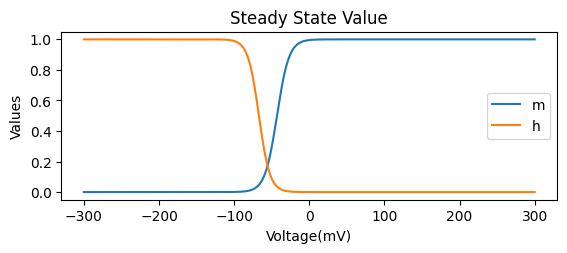

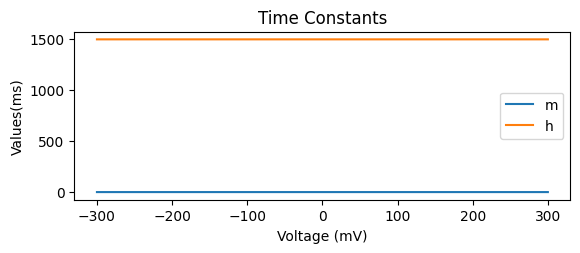

In [187]:
# 绘图：Kd离子通道
plt.clf()

# 稳定态和时间常数随膜电位变化的图像（画成一张大图里的两张子图）
plt.subplot(2, 1, 1)
plt.plot(v, mInf_Kd)
plt.plot(v, hInf_Kd)
plt.title('Steady State Value')
plt.xlabel('Voltage(mV)')
plt.ylabel('Values')
plt.legend(['m', 'h'])
plt.show()
plt.subplot(2, 1, 2)
plt.plot(v, mTau_Kd)
plt.plot(v, hTau_Kd)
plt.title('Time Constants')
plt.xlabel('Voltage (mV)')
plt.ylabel('Values(ms)')
plt.legend(['m', 'h'])
plt.show()

In [188]:
# Kv2-like离子通道

# 初始化参数
g_max_Kv2like = 0.00001                                              # 最大电导（S/cm²）
T_Kv2like = 34                                                       # 目标温度（℃）
T_base_Kv2like = 21                                                  # 初始温度（℃）
Q10_Kv2like = 2.3                                                    # 温度升高10℃的速率比
qt_Kv2like = Q10_Kv2like ** ((T_Kv2like - T_base_Kv2like) / 10)      # 温度因子（也称作纠错率 corrected rates）
mAlpha_Kv2like = np.zeros(len(v))                                    # 门控变量m的开门速率
mBeta_Kv2like = np.zeros(len(v))                                     # 门控变量m的关门速率
mTau_Kv2like = np.zeros(len(v))                                      # 门控变量m的时间常数
mInf_Kv2like = np.zeros(len(v))                                      # 门控变量m的稳定态
h1Tau_Kv2like = np.zeros(len(v))                                     # 门控变量h1的时间常数
h2Tau_Kv2like = np.zeros(len(v))                                     # 门控变量h2的时间常数
hInf_Kv2like = np.zeros(len(v))                                      # 门控变量h1和h2的稳定态

# 定义函数Vtrap
def V_Trap(x, y):
    if np.fabs(x / y) < 1e-6:
        return y * (1 - x / y / 2)
    else:
        return x / (np.exp(x / y) - 1)

# 计算离子通道的门控动力学，即稳定态x∞和时间常数τx
for i in range(0, len(v)):
    mAlpha_Kv2like[i] = 0.12 * V_Trap(-(v[i] - 43), 11.0)
    mBeta_Kv2like[i] = 0.02 * np.exp(-(v[i] + 1.27) / 120)
    mInf_Kv2like[i] = mAlpha_Kv2like[i] / (mAlpha_Kv2like[i] + mBeta_Kv2like[i])
    mTau_Kv2like[i] = 2.5 * (1 / (qt_Kv2like * (mAlpha_Kv2like[i] + mBeta_Kv2like[i])))
    hInf_Kv2like[i] =  1 / (1 + np.exp((v[i] + 58) / 11))
    h1Tau_Kv2like[i] = (360 + (1010 + 23.7 * (v[i] + 54)) * np.exp(-((v[i] + 75) / 48) ** 2)) / qt_Kv2like
    h2Tau_Kv2like[i] = (2350 + 1380 * np.exp(-0.011 * v[i]) - 210 * np.exp(-0.03 * v[i])) / qt_Kv2like

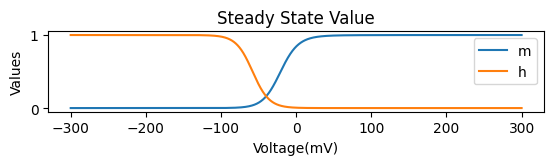

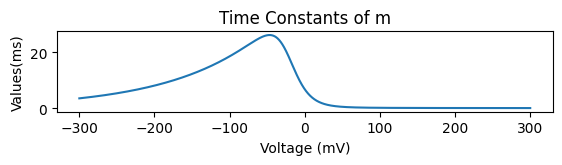

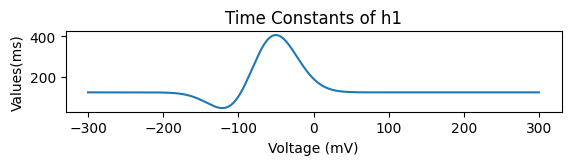

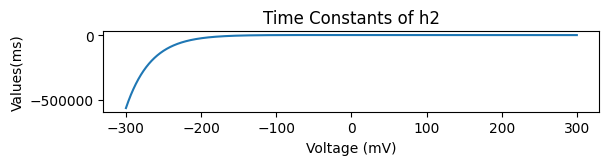

In [189]:
# 绘图：Kv2-like离子通道
plt.clf()

# 稳定态和时间常数随膜电位变化的图像（画成一张大图里的两张子图）
plt.subplot(4, 1, 1)
plt.plot(v, mInf_Kv2like)
plt.plot(v, hInf_Kv2like)
plt.title('Steady State Value')
plt.xlabel('Voltage(mV)')
plt.ylabel('Values')
plt.legend(['m', 'h'])
plt.show()
plt.subplot(4, 1, 2)
plt.plot(v, mTau_Kv2like)
plt.title('Time Constants of m')
plt.xlabel('Voltage (mV)')
plt.ylabel('Values(ms)')
plt.show()
plt.subplot(4, 1, 3)
plt.plot(v, h1Tau_Kv2like)
plt.title('Time Constants of h1')
plt.xlabel('Voltage (mV)')
plt.ylabel('Values(ms)')
plt.show()
plt.subplot(4, 1, 4)
plt.plot(v, h2Tau_Kv2like)
plt.title('Time Constants of h2')
plt.xlabel('Voltage (mV)')
plt.ylabel('Values(ms)')
plt.show()

In [190]:
# Kv3_1（Kv3-like）离子通道

# 初始化参数
g_max_Kv3_1 = 0.00001                                              # 最大电导（S/cm²）
mTau_Kv3_1 = np.zeros(len(v))                                      # 门控变量m的时间常数
mInf_Kv3_1 = np.zeros(len(v))                                      # 门控变量m的稳定态

# 暂时未弄清这个参数的作用
v_shift_Kv3_1 = 0

# 计算离子通道的门控动力学，即稳定态x∞和时间常数τx
for i in range(0, len(v)):
    mInf_Kv3_1[i] = 1 / (1 + np.exp(((v[i] -(18.700 + v_shift_Kv3_1)) / (-9.700))))
    mTau_Kv3_1[i] = 0.2 * 20.000/(1 + np.exp(((v[i] -(-46.560 + v_shift_Kv3_1)) / (-44.140))))

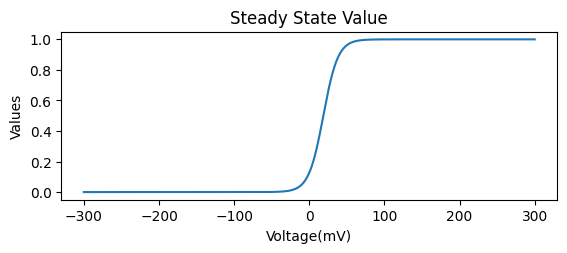

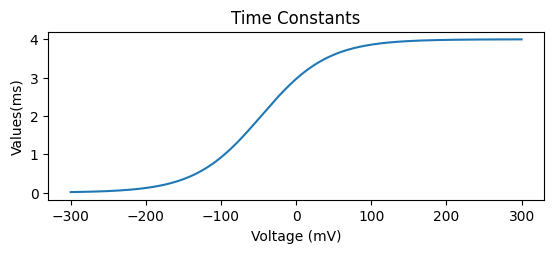

In [191]:
# 绘图：Kv3_1（Kv3-like）离子通道
plt.clf()

# 稳定态和时间常数随膜电位变化的图像（画成一张大图里的两张子图）
plt.subplot(2, 1, 1)
plt.plot(v, mInf_Kv3_1)
plt.title('Steady State Value')
plt.xlabel('Voltage(mV)')
plt.ylabel('Values')
plt.show()
plt.subplot(2, 1, 2)
plt.plot(v, mTau_Kv3_1)
plt.title('Time Constants')
plt.xlabel('Voltage (mV)')
plt.ylabel('Values(ms)')
plt.show()

In [192]:
# NaP离子通道

# 初始化参数
g_max_NaP = 0.00001                                              # 最大电导（S/cm²）
T_NaP = 34                                                       # 目标温度（℃）
T_base_NaP = 21                                                  # 初始温度（℃）
Q10_NaP = 2.3                                                    # 温度升高10℃的速率比
qt_NaP = Q10_NaP ** ((T_NaP - T_base_NaP) / 10)                  # 温度因子（也称作纠错率 corrected rates）
mInf_NaP = np.zeros(len(v))                                      # 门控变量m的稳定态
hAlpha_NaP = np.zeros(len(v))                                    # 门控变量h的开门速率
hBeta_NaP = np.zeros(len(v))                                     # 门控变量h的关门速率
hTau_NaP = np.zeros(len(v))                                      # 门控变量h的时间常数
hInf_NaP = np.zeros(len(v))                                      # 门控变量h的稳定态

# 定义函数Vtrap
def V_Trap(x, y):
    if np.fabs(x / y) < 1e-6:
        return y * (1 - x / y / 2)
    else:
        return x / (np.exp(x / y) - 1)

# 计算离子通道的门控动力学，即稳定态x∞和时间常数τx
for i in range(0, len(v)):
    mInf_NaP[i] = 1.0 / (1 + np.exp((v[i] - (-52.6)) / -4.6))
    hInf_NaP[i] = 1.0 / (1 + np.exp((v[i] - (-48.8)) / 10))
    hAlpha_NaP[i] = 2.88e-6 * V_Trap(v[i] + 17, 4.63)
    hBeta_NaP[i] = 6.94e-6 * V_Trap(-(v[i] + 64.4), 2.63)
    hTau_NaP[i] = (1 / (hAlpha_NaP[i] + hBeta_NaP[i])) / qt_NaP

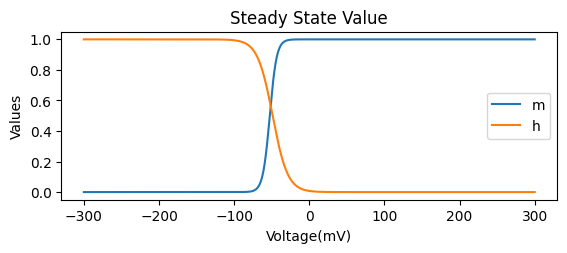

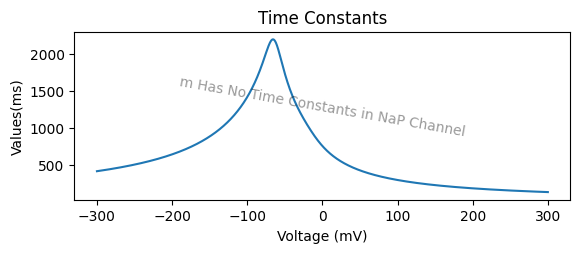

In [193]:
# 绘图：NaP离子通道
plt.clf()

# 稳定态和时间常数随膜电位变化的图像（画成一张大图里的两张子图）
plt.subplot(2, 1, 1)
plt.plot(v, mInf_NaP)
plt.plot(v, hInf_NaP)
plt.title('Steady State Value')
plt.xlabel('Voltage(mV)')
plt.ylabel('Values')
plt.legend(['m', 'h'])
plt.show()
plt.subplot(2, 1, 2)
plt.plot(v, hTau_NaP)
# 加个水印，提示在MOD文件中，NaP离子通道的门控变量m没有时间常数，因为根据Magistretti和Alonso的模型，m是瞬时激活的
plt.text(0, 900, 'm Has No Time Constants in NaP Channel', ha='center', rotation=-10, alpha=0.4)
plt.title('Time Constants')
plt.xlabel('Voltage (mV)')
plt.ylabel('Values(ms)')
plt.show()

In [194]:
# NaTa离子通道

# 初始化参数
g_max_NaTa = 0.00001                                              # 最大电导（S/cm²）
T_NaTa = 34                                                       # 目标温度（℃）
T_base_NaTa = 23                                                  # 初始温度（℃）
Q10_NaTa = 2.3                                                    # 温度升高10℃的速率比
qt_NaTa = Q10_NaTa ** ((T_NaTa - T_base_NaTa) / 10)               # 温度因子（也称作纠错率 corrected rates）
mAlpha_NaTa = np.zeros(len(v))                                    # 门控变量m的开门速率
mBeta_NaTa = np.zeros(len(v))                                     # 门控变量m的关门速率
mInf_NaTa = np.zeros(len(v))                                      # 门控变量m的稳定态
mTau_NaTa = np.zeros(len(v))                                      # 门控变量m的时间常数
hAlpha_NaTa = np.zeros(len(v))                                    # 门控变量h的开门速率
hBeta_NaTa = np.zeros(len(v))                                     # 门控变量h的关门速率
hTau_NaTa = np.zeros(len(v))                                      # 门控变量h的时间常数
hInf_NaTa = np.zeros(len(v))                                      # 门控变量h的稳定态

# 其他参数
malphaF_NaTa = 0.182
mbetaF_NaTa = 0.124
mvhalf_NaTa = -48
mk_NaTa = 6
halphaF_NaTa = 0.015
hbetaF_NaTa = 0.015
hvhalf_NaTa = -69
hk_NaTa = 6

# 定义函数Vtrap
def V_Trap(x, y):
    if np.fabs(x / y) < 1e-6:
        return y * (1 - x / y / 2)
    else:
        return x / (np.exp(x / y) - 1)

# 计算离子通道的门控动力学，即稳定态x∞和时间常数τx
for i in range(0, len(v)):
    mAlpha_NaTa[i] = malphaF_NaTa * V_Trap(-(v[i] - mvhalf_NaTa), mk_NaTa)
    mBeta_NaTa[i] = mbetaF_NaTa * V_Trap((v[i] - mvhalf_NaTa), mk_NaTa)
    mInf_NaTa[i] = mAlpha_NaTa[i] / (mAlpha_NaTa[i] + mBeta_NaTa[i])
    mTau_NaTa[i] = (1 / (mAlpha_NaTa[i] + mBeta_NaTa[i])) / qt_NaTa

    hAlpha_NaTa[i] = halphaF_NaTa * V_Trap(v[i] - hvhalf_NaTa, hk_NaTa)
    hBeta_NaTa[i] = hbetaF_NaTa * V_Trap(-(v[i] - hvhalf_NaTa), hk_NaTa)
    hInf_NaTa[i] = hAlpha_NaTa[i] / (hAlpha_NaTa[i] + hBeta_NaTa[i])
    hTau_NaTa[i] = (1 / (hAlpha_NaTa[i] + hBeta_NaTa[i])) / qt_NaTa

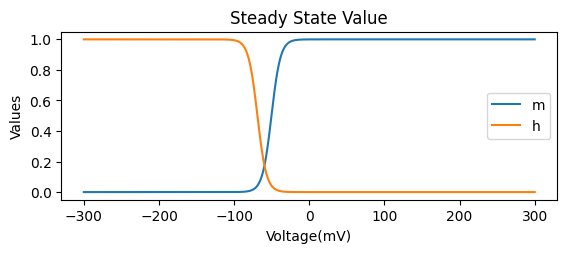

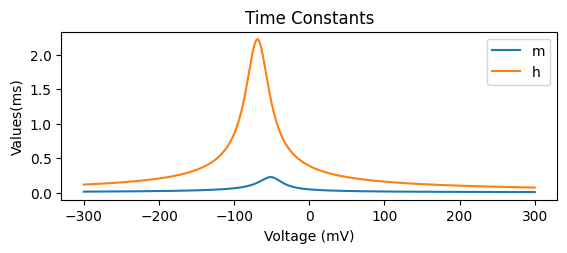

In [195]:
# 绘图：NaTa离子通道
plt.clf()

# 稳定态和时间常数随膜电位变化的图像（画成一张大图里的两张子图）
plt.subplot(2, 1, 1)
plt.plot(v, mInf_NaTa)
plt.plot(v, hInf_NaTa)
plt.title('Steady State Value')
plt.xlabel('Voltage(mV)')
plt.ylabel('Values')
plt.legend(['m', 'h'])
plt.show()
plt.subplot(2, 1, 2)
plt.plot(v, mTau_NaTa)
plt.plot(v, hTau_NaTa)
plt.title('Time Constants')
plt.xlabel('Voltage (mV)')
plt.ylabel('Values(ms)')
plt.legend(['m', 'h'])
plt.show()